In [116]:
clear;
clc;
close all;

In [117]:
load('ex7data1.mat');
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        X          50x2                        800  double

Total is 100 elements using 800 bytes



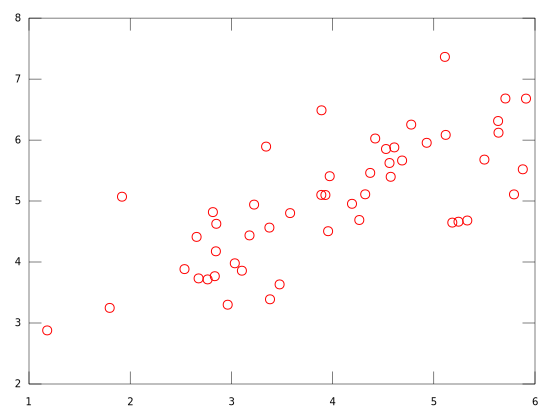

In [118]:
plot(X(:, 1), X(:,2), 'ro', 'markersize', 3)

In [119]:
function idx = findClosestCentroids(X, centroids)
    K = length(centroids);
    m = size(X, 1);
    idx = zeros(m, 1);
    
    for i = 1:m
        [v, c] = min(sum((centroids - X(i, :)) .^ 2, 2));
        idx(i) = c;
    end
end

In [120]:
function [C, centroids] = KMeans(X, K)
    [m, n] = size(X);
    C = zeros(m, 1);
    randIdx = randperm(m, K);
    
    centroids = X(randIdx, :);
    
    preJ = 0;
    
    while true,
        C = findClosestCentroids(X, centroids);
        for k = 1:K
            kIdx = find(C == k);
            centroids(k, :) = mean(X(kIdx, :));
        end
        newJ = computeCostFunction(X, C, centroids, K)
        if (newJ < preJ || preJ == 0)
            preJ = newJ;
        else
            break
        end
    end
end

In [121]:
function J = computeCostFunction(X, C, centroids, K)
    m = length(C);
    J = 0;
    for k = 1:K
        kIdx = find(C == k);
        J += sum(sum((X(kIdx, :) - centroids(k)) .^ 2, 2));
    end
    J = J / m;
end

In [122]:
function plotData(X, C, K)
    hold on;
    markers = {'ro', 'bo', 'ko', 'mo', 'co'}; 
    for k = 1:K
        cIdx = find(C == k);
        plot(X(cIdx, 1), X(cIdx, 2), markers{k}, 'markersize', 3);
    end
    hold off;
end

newJ =  2.1394
newJ =  1.9366
newJ =  1.9034
newJ =  1.9034


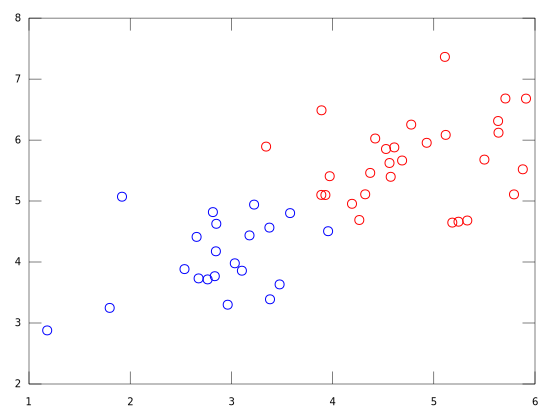

In [124]:
K = 2;
[C, centroids] = KMeans(X, K);
C = findClosestCentroids(X, centroids);
J = computeCostFunction(X, C, centroids, K);
plotData(X, C, K);

newJ =  1.8486
newJ =  1.6830
newJ =  1.6942


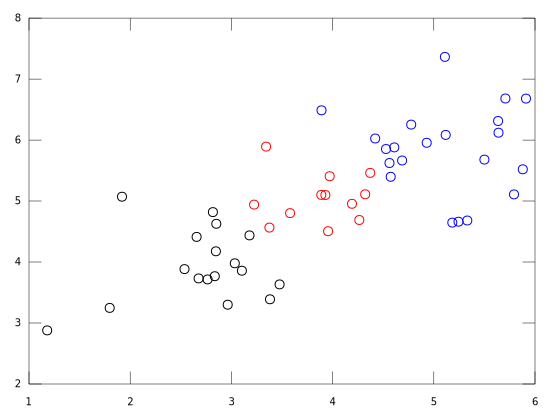

In [125]:
K = 3;
[C, centroids] = KMeans(X, K);
C = findClosestCentroids(X, centroids);
J = computeCostFunction(X, C, centroids, K);
plotData(X, C, K);

newJ =  1.9892
newJ =  1.8321
newJ =  1.8255
newJ =  1.8126
newJ =  1.7998
newJ =  1.7998


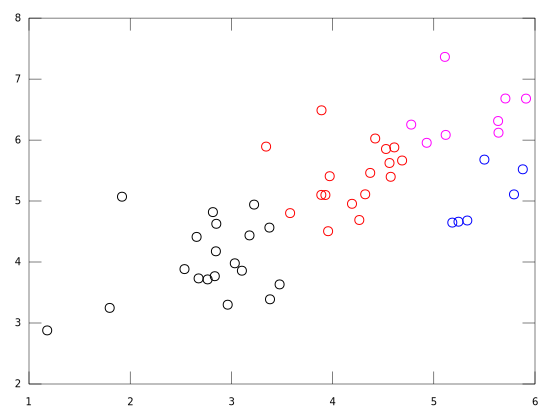

In [126]:
K = 4;
[C, centroids] = KMeans(X, K);
C = findClosestCentroids(X, centroids);
J = computeCostFunction(X, C, centroids, K);
plotData(X, C, K);

## Image Compression with K-means

对一个具有 $128 * 128$ 像素的图片，每一个像素用 3 个 8 位无符号整数（0 ~ 255），即 24 位来表示像素点上的颜色。这个图片上一共有 $2^{14}$ 种颜色。我们可以把 $2^{14}$ 种颜色 clustering into 16 种颜色，然后用 16 种颜色来表示该图片。即用 K-means 找出 16 种颜色后，然后 4 个 bit 位就可以存储这 16 种颜色，而原来的 128 * 128 的点只需要存储这 4 个 bit 位对应的颜色索引即可。

In [147]:
A = double(imread('bird_small.png'));

In [148]:
A = A/255;
img_size = size(A)
A(1, 1, :)

img_size =

   128   128     3

ans =

ans(:,:,1) =  0.85882
ans(:,:,2) =  0.70588
ans(:,:,3) =  0.40392



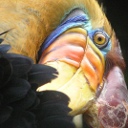

In [149]:
imagesc(A)

In [150]:
K = 16;
[C, centroids] = KMeans(A, K);
size(C)
centroids;

newJ =  70.692
newJ =  70.784
ans =

   128     1



In [151]:
idx = findClosestCentroids(A, centroids);
X_recovered = centroids(idx, :);
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);
size(X_recovered)
X_recovered(1:3, 1:3, :)

ans =

   128   128     3

ans =

ans(:,:,1) =

   0.87288   0.88039   0.86993
   0.87288   0.88039   0.86993
   0.87288   0.88039   0.86993

ans(:,:,2) =

   0.72974   0.73268   0.72843
   0.72974   0.73268   0.72843
   0.72974   0.73268   0.72843

ans(:,:,3) =

   0.46634   0.47092   0.46732
   0.46634   0.47092   0.46732
   0.46634   0.47092   0.46732



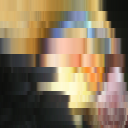

In [154]:
imagesc(X_recovered)

上面的效果不是太好，可能设定最大 maxIter = 10 会好些。